In [31]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm

d2020= pd.read_csv("DraftResultsData/2020draft.csv")

#Create list to store players names for cleaning up
split_player = d2020["Player"]
#Split out and store the name of the player
players=[i.split("\\")[0] for i in split_player]
#Split out and store first and last names
fname = [i.split(maxsplit = 1)[0] for i in players]
lname = [i.split(maxsplit = 1)[1] for i in players]
#Add first and last name columns
d2020["First Name"]=fname
d2020["Last Name"]=lname

#Create new df in the format desired
d2020c = d2020[["Rnd","Pick","Tm","First Name","Last Name","Pos","Age","College/Univ"]]

#Import data from 2019 draft
d2019= pd.read_csv("DraftResultsData/2019Draft_Rank.csv")
#Create df that only includes players drafted
drafted2019 = d2019.dropna()
drafted2019.head()

,Pick Overall,Rank,Grade,First Name,Last Name,Position,Height,Weight,College,Team
0,2.0,1,95,Nick,Bosa,DE,"6'3¾""",266,Ohio State,San Francisco
1,3.0,2,95,Quinnen,Williams,DT,"6'3""",303,Alabama,NY Jets
2,9.0,3,94,Ed,Oliver,DT,"6'1⅞""",287,Houston,Buffalo
3,5.0,4,94,Devin,White,ILB,"6'0""",237,LSU,Tampa Bay
4,7.0,5,93,Josh,Allen,OLB,"6'4⅞""",262,Kentucky,Jacksonville


In [28]:
#Generate Scatter Plot, Regression Line, r, r^2 of Rank vs Pick Overall
def linreganal(df,x_values,y_values):
    #run linear regression and store key values
    slope, intercept, r_value, p_value, std_err = st.linregress(df[x_values],df[y_values])

    #generate predicted y values based on regression model
    regress_values = df[x_values] * slope + intercept

    #store linear regression equation and correlation coefficient
    line_eq = "ŷ = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    corr_coef = "r = " + str(round(r_value,4))
    r_2 = "r^2 = " + str(round(r_value**2,4))

    #plot regression line
    plt.plot(df[x_values], regress_values, "r-")

    #plot regression equation and correlation coefficient on the graph
    plt.annotate(line_eq, (150,50),fontsize = 12, color = 'red')
    plt.annotate(corr_coef,(150,35),fontsize = 12, color = 'red')
    plt.annotate(r_2,(150,20),fontsize = 12, color = 'red')
    #plt.annotate("New York", (20000000,14000),fontsize =12, color = 'red')
    #plt.annotate("California", (35000000,2000),fontsize =12, color = 'red')
    #plt.annotate("New Jersey", (5000000,6000),fontsize =12, color = 'red')

    #Create scatter plot and add title, x-labels, and y-labels
    plt.scatter(df[x_values], df[y_values])
    plt.title(f"{x_values} vs {y_values}")
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    plt.tight_layout()
    plt.savefig(f"Graphics/{x_values}vs{y_values}.png")
    plt.show()

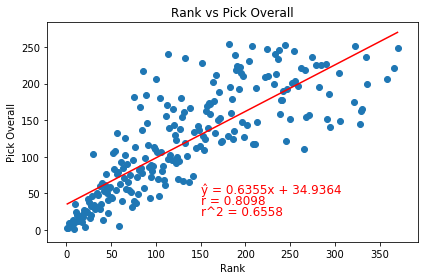

In [32]:
linreganal(drafted2019,"Rank","Pick Overall")

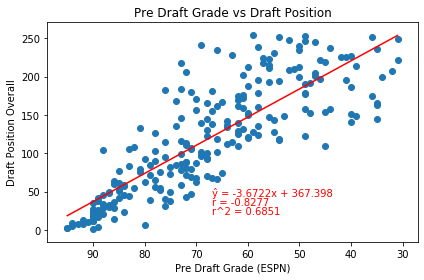

In [24]:
#Create df that only includes players drafted
drafted2019 = d2019.dropna()

# x_values = drafted2019['Grade']
# y_values = drafted2019['Pick Overall']
#run linear regression and store key values
slope, intercept, r_value, p_value, std_err = st.linregress(drafted2019['Grade'],drafted2019['Pick Overall'])

#generate predicted y values based on regression model
regress_values = drafted2019['Grade'] * slope + intercept

#store linear regression equation and correlation coefficient
line_eq = "ŷ = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
corr_coef = "r = " + str(round(r_value,4))
r_2 = "r^2 = " + str(round(r_value**2,4))


#plot regression line
plt.plot(drafted2019['Grade'], regress_values, "r-")

#plot regression equation and correlation coefficient on the graph
plt.annotate(line_eq, (67,44),fontsize = 10, color = 'red')
plt.annotate(corr_coef,(67,32),fontsize = 10, color = 'red')
plt.annotate(r_2,(67,20),fontsize = 10, color = 'red')
#plt.annotate("New York", (20000000,14000),fontsize =12, color = 'red')
#plt.annotate("California", (35000000,2000),fontsize =12, color = 'red')
#plt.annotate("New Jersey", (5000000,6000),fontsize =12, color = 'red')

#Create scatter plot and add title, x-labels, and y-labels

plt.scatter(drafted2019['Grade'], drafted2019['Pick Overall'])
plt.gca().invert_xaxis()
plt.title("Pre Draft Grade vs Draft Position")
plt.xlabel('Pre Draft Grade (ESPN)')
plt.ylabel('Draft Position Overall')
plt.tight_layout()
plt.savefig("Graphics/RankvsDraft.png")
plt.show()

In [127]:
x_values = drafted2019['Rank']
y_values = drafted2019['Pick Overall']
x_values = sm.add_constant(x_values)
# Note the difference in argument order
model = sm.OLS(y_values, x_values).fit()
predictions = model.predict(x_values) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Pick Overall   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     428.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           5.05e-54
Time:                        16:43:42   Log-Likelihood:                -1170.1
No. Observations:                 227   AIC:                             2344.
Df Residuals:                     225   BIC:                             2351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9364      4.924      7.095      0.000      25.234      44.639
Rank           0.6355      0.031     20.706      0.000       0.575       0.696
==============================================================================
Omnibus:                       15.006   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.007
Skew:                           0.622   Prob(JB):                     0.000334
Kurtosis:                       3.378   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
x_values = drafted2019[['Rank','Grade']]
y_values = drafted2019['Pick Overall']

# Note the difference in argument order
model2 = sm.OLS(y_values, x_values).fit()
predictions = model2.predict(x_values) # make the predictions by the model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Pick Overall   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              1105.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):                   4.36e-117
Time:                        16:47:03   Log-Likelihood:                         -1171.4
No. Observations:                 227   AIC:                                      2347.
Df Residuals:                     225   BIC:                                      2354.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rank           0.7060      0.024     29.909      0.000       0.659       0.752
Grade          0.3743      0.054      6.875      0.000       0.267       0.482
==============================================================================
Omnibus:                       14.693   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.613
Skew:                           0.611   Prob(JB):                     0.000407
Kurtosis:                       3.395   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
positions = d2019["Position"].unique()

In [100]:
posdfs ={i:d2019[d2019["Position"]==i] for i in positions}

In [101]:
posdfs["QB"]

,Pick Overall,Rank,Grade,First Name,Last Name,Position,Height,Weight,College,Team
8,1.0,9,90,Kyler,Murray,QB,"5'10⅛""",207,Oklahoma,Arizona
14,15.0,15,90,Dwayne,Haskins,QB,"6'3⅜""",231,Ohio State,Washington
23,42.0,24,89,Drew,Lock,QB,"6'3¾""",228,Missouri,Denver
29,104.0,30,88,Ryan,Finley,QB,"6'4""",213,NC State,Cincinnati
55,133.0,56,81,Jarrett,Stidham,QB,"6'2⅜""",218,Auburn,New England
58,6.0,59,80,Daniel,Jones,QB,"6'5⅛""",221,Duke,NY Giants
123,100.0,124,68,Will,Grier,QB,"6'2½""",217,West Virginia,Carolina
135,NaN,136,66,Tyree,Jackson,QB,"6'7""",249,Buffalo,NaN
137,167.0,138,65,Clayton,Thorson,QB,"6'4""",222,Northwestern,Philadelphia
239,178.0,240,49,Gardner,Minshew,QB,"6'0⅞""",225,Washington State,Jacksonville


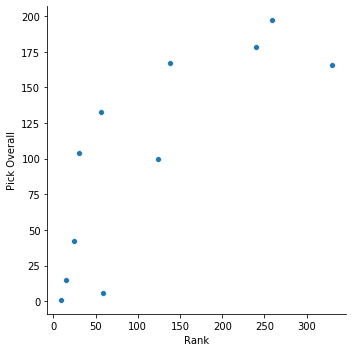

In [121]:

sns.relplot(x = "Rank", y= "Pick Overall",data = posdfs["QB"])